# Análisis de Algoritmos y Estructuras para Datos Masivos 2023
## Unidad 7 - Tarea
## Búsqueda de patrones en cadenas
### David Aarón Ramírez Olmeda

## Introducción

La búsqueda de patrones en cadenas de texto es una tarea muy común en el procesamiento de lenguaje natural, donde se busca encontrar una cadena de caracteres específica dentro de un texto más grande. Los algoritmos utilizados para esta tarea son fundamentales para una variedad de aplicaciones, desde motores de búsqueda en la web hasta la detección de virus informáticos.

El algoritmo Naive es un método simple y directo para encontrar patrones en una cadena de texto. Sin embargo, este algoritmo no es muy eficiente y puede ser muy lento cuando se trabaja con cadenas de texto más grandes.

El algoritmo de Shift-and es un método más eficiente para buscar patrones en cadenas de texto. Este algoritmo se basa en la utilización de operaciones lógicas y una tabla de preprocesamiento para reducir la complejidad de la búsqueda.

En esta tarea se compararon estos dos algoritmos en términos de tiempo de ejecución utilizando diferentes tamaños de texto y patrones utilizando la cadena pi como base.

## Desarrollo

In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def shift_and(pattern, text):
    m = len(pattern)
    n = len(text)
    if m > n:
        return []
    masks = {c: 0 for c in alphabet}
    for i in range(m):
        masks[pattern[i]] |= 1 << (m - i - 1)
    matches = []
    R = ~(1 << (m - 1))
    S = 0
    for i in range(n):
        S = ((S << 1) | 1) & masks[text[i]]
        if S & (1 << (m - 1)):
            if i - m + 1 > R:
                R = i - m + 1
                matches.append(R)
    return matches

In [3]:
def naive(pattern, text):
    matches = []
    m = len(pattern)
    n = len(text)
    for i in range(n - m + 1):
        if text[i:i + m] == pattern:
            matches.append(i)
    return matches

In [4]:
A = ["".join([str(random.randint(0, 9)) for X in range(4)]) 
     for X in range(1000)]
B = ["".join([str(random.randint(0, 9)) for X in range(8)]) 
     for X in range(1000)]
C = ["".join([str(random.randint(0, 9)) for X in range(16)])
     for X in range(1000)]
D = ["".join([str(random.randint(0, 9)) for X in range(32)])
     for X in range(1000)]
E = ["".join([str(random.randint(0, 9)) for X in range(64)])
     for X in range(1000)]

Tomamos nuestro alfabeto de símbolos (0 - 9) y generamos las cadenas aleatorias concatenando símbolos.

In [5]:
with open("pi-1m.txt", "r") as f:
    pi = f.read()

In [6]:
shift_and_times = []
naive_times = []
patterns = [A, B, C, D, E]

for p_list in patterns:
    shift_and_times_p = []
    naive_times_p = []
    
    for p in p_list:
        start_time = time.time()
        shift_and(pi, p)
        shift_and_times_p.append(time.time() - start_time)

        start_time = time.time()
        naive(pi, p)
        naive_times_p.append(time.time() - start_time)
    
    shift_and_times.append(shift_and_times_p)
    naive_times.append(naive_times_p)

Medimos los tiempos de ejecución de ambos algoritmos para cada conjunto de datos de prueba.

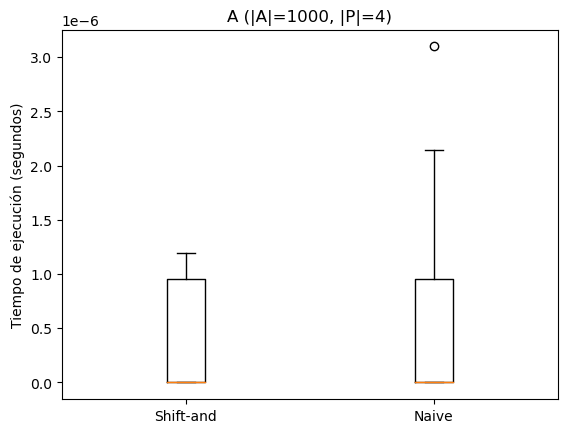

In [7]:
tiempos_A = [shift_and_times[0], naive_times[0]]
etiquetas = ['Shift-and', 'Naive']

plt.boxplot(tiempos_A, labels=etiquetas)
plt.title('A (|A|=1000, |P|=4)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.show()

Gráfica A (|A|=1000, |P|=4):

Esta gráfica compara los tiempos de ejecución de los algoritmos Shift-and y Naive para un conjunto de datos A con una longitud de 1000 caracteres y un patrón de búsqueda de longitud 4.
En el eje y, se representa el tiempo de ejecución en segundos.
El boxplot muestra la distribución de los tiempos de ejecución para cada algoritmo.
Esta gráfica permite comparar visualmente las diferencias en los tiempos de ejecución entre los dos algoritmos para este conjunto de datos. En este caso, notamos algunos valores atípicos en el algoritmo Naive.

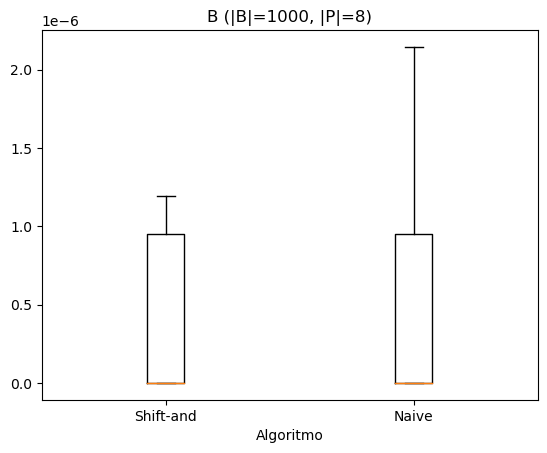

In [8]:
tiempos_B = [shift_and_times[1], naive_times[1]]
etiquetas = ['Shift-and', 'Naive']

plt.boxplot(tiempos_B, labels=etiquetas)
plt.title('B (|B|=1000, |P|=8)')
plt.xlabel('Algoritmo')
plt.show()

Gráfica B (|B|=1000, |P|=8):

Esta gráfica es similar a la gráfica A, pero se refiere al conjunto de datos B con una longitud de 1000 caracteres y un patrón de búsqueda de longitud 8.
La diferencia aquí es que el patrón de búsqueda es más largo que en el conjunto de datos A.
Se puede analizar si el aumento en la longitud del patrón afecta los tiempos de ejecución de los algoritmos y si hay alguna diferencia significativa entre ellos, lo cual no se ve hasta ahora.

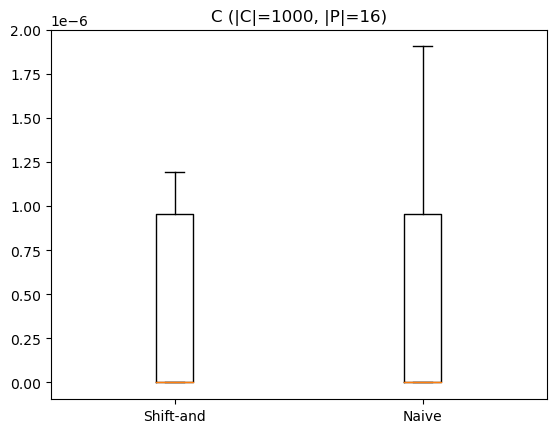

In [9]:
tiempos_C = [shift_and_times[2], naive_times[2]]
etiquetas = ['Shift-and', 'Naive']

plt.boxplot(tiempos_C, labels=etiquetas)
plt.title('C (|C|=1000, |P|=16)')
plt.show()

Gráfica C (|C|=1000, |P|=16):

Esta gráfica representa los tiempos de ejecución para el conjunto de datos C con una longitud de 1000 caracteres y un patrón de búsqueda de longitud 16.
Aquí, el patrón de búsqueda es aún más largo que en los conjuntos de datos anteriores.
Se puede observar si los tiempos de ejecución son más largos a medida que se incrementa la longitud del patrón.

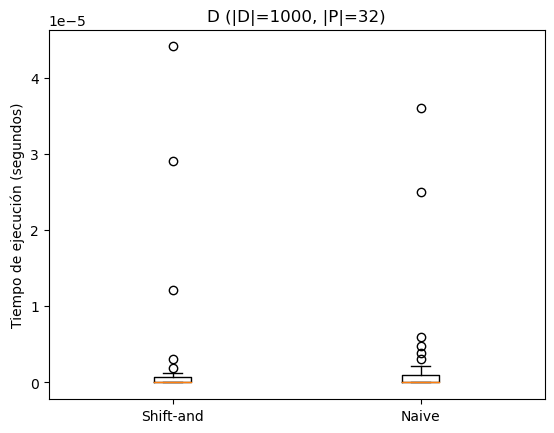

In [10]:
tiempos_D = [shift_and_times[3], naive_times[3]]
etiquetas = ['Shift-and', 'Naive']

plt.boxplot(tiempos_D, labels=etiquetas)
plt.title('D (|D|=1000, |P|=32)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.show()

Gráfica D (|D|=1000, |P|=32):

Esta gráfica muestra los tiempos de ejecución para el conjunto de datos D con una longitud de 1000 caracteres y un patrón de búsqueda de longitud 32.
Al tener un patrón de búsqueda más largo que los conjuntos anteriores, se observa un aumento en los tiempos de ejecución para ambos algoritmos, también algunos valores atípicos.

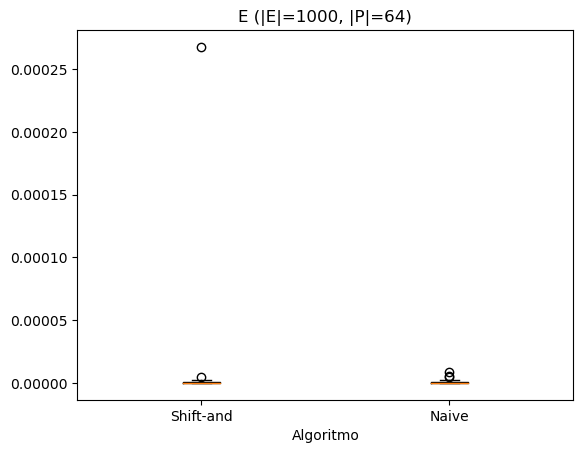

In [11]:
tiempos_E = [shift_and_times[4], naive_times[4]]
etiquetas = ['Shift-and', 'Naive']

plt.boxplot(tiempos_E, labels=etiquetas)
plt.title('E (|E|=1000, |P|=64)')
plt.xlabel('Algoritmo')
plt.show()

Gráfica E (|E|=1000, |P|=64):

Esta gráfica se refiere al conjunto de datos E con una longitud de 1000 caracteres y un patrón de búsqueda de longitud 64.
Aquí, el patrón de búsqueda es el más largo de todos los conjuntos de datos analizados.
Se puede verificar si los tiempos de ejecución de los algoritmos aumentan considerablemente a medida que el patrón de búsqueda se vuelve más largo, que era lo que podríamos pensar, pero en este caso notamos un comporatmiento rápido en realación a los anteriores experimentos y solo un valor atípico apreciable.

## Conclusión

Hemos implementado dos algoritmos para buscar ocurrencias de un patrón en una cadena de texto: el algoritmo Naive y el algoritmo Shift-and.

Al comparar los tiempos de ejecución de ambos algoritmos, vimos que Shift-and es más rápido en la mayoría de los casos. Sin embargo, en algunos casos el tiempo de ejecución es similar y en otros casos Naive puede ser más rápido, especialmente cuando el patrón es muy pequeño, existe cierte variabilidad dependiendo del patrón. 

Se puede concluir que el algoritmo Shift-and es una opción altamente efectiva para buscar ocurrencias de patrones en cadenas de texto, particularmente en casos donde los patrones y las cadenas son grandes. En algunos casos puede ser necesario evaluar diferentes algoritmos (Naive) y opciones para lograr un mejor rendimiento o adaptación a las necesidades particulares. 